# Imports

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg as sci

# Definitions

In [4]:
### Definitions
def flick(t):
    if t >= 0 and t <= 2:
        return (t * (2 - t)) ** 3
    else:
        return 0

### Length of interval
I = 10

### dx and dt
dx = 1/50
dt = 1/100

### x range
x = np.linspace(1, 11, num = 10 * 50 + 1)

### Number of mesh points
N = len(x)

### d(x) and e(x) (d(x) = e(x) for all cases)
def de(case, x):
    if case == 0 or case == 1:
        return 1
    if case == 2:
        return x
    if case == 3:
        return x**2


# Dealing with M and S matrices

In [25]:
### Defining M and S matrices
def MS(case):
    M = np.zeros((N, N))
    S = np.zeros((N, N))
    for i in range(1, N):
        dx = x[i] - x[i-1]
        xmid = (x[i] + x[i-1]) / 2
        ### Because d(x) and e(x) are the same for these cases
        coef = de(case, xmid)
        M[i-1, i-1] += coef * dx / 3
        M[i-1, i] = coef * dx / 6
        M[i, i-1] = coef * dx / 6
        M[i, i] = coef * dx / 3
        S[i-1, i-1] += coef / dx
        S[i-1, i] = -coef / dx
        S[i, i-1] = -coef / dx
        S[i, i] = coef / dx
    return (M, S)

def tridiag(diag_matrix):
    diag = np.zeros((3, N))
    diag[1, 0] = diag_matrix[0, 0]
    diag[2, 0] = diag_matrix[1, 0]
    for i in range(1, N):
        diag[0, i] = diag_matrix[i-1, i]
        diag[1, i] = diag_matrix[i, i]
        diag[2, i] = diag_matrix[i, i-1]
        if i == N-1:
            diag[2,i] = 0
    return diag

matrix = MS(0)[0]

# Iterating

In [34]:
def step(M, S, U, V, bc, dt_count):
    left = (1/dt) * tridiag(M) + (dt/4) * tridiag(S)
    right = np.dot(-1 * S, U + (dt/2) * V)
    left[1][0] = 1
    dU0 = U[0]
    dV0 = V[0]
    if bc == "dirichlet":
        right[-1] = 0
        dU0 = flick(dt_count + dt) - flick(dt_count)
        dV0 = 2 * (dU0 / dt - V[0])
    dV = sci.solve_banded((1,1), left, right)
    dU = dt * (V + (1/2) * dV)
    U += dU
    V += dV
    if bc == "dirichlet":
        U[0] = U[0] - dU[0] + dU0
        V[0] = V[0] - dV[0] + dV0
    U[0] = flick(dt_count)
    return (U, V)

def UV(M, S, U, V, stop, bc):
    dt_count = dt
    while dt_count <= stop:
        UV_step = step(M_0, S_0, U, V, bc, dt_count)
        U = UV_step[0]
        V = UV_step[1]
        dt_count += dt
    return (U,V)

# Case 0

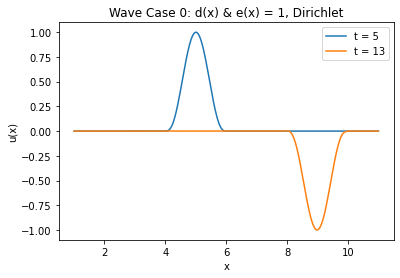

In [35]:
### Case 0

(M_0, S_0) = MS(0)
U = np.zeros(N)
V = np.zeros(N)
U_0_5 = UV(M_0, S_0, U, V, 5, "dirichlet")[0]

U = np.zeros(N)
V = np.zeros(N)
U_0_13 = UV(M_0, S_0, U, V, 13, "dirichlet")[0]

fig, ax = plt.subplots()
ax.set_xlabel('x')
ax.set_ylabel('u(x)')
ax.set_title('Wave Case 0: d(x) & e(x) = 1, Dirichlet')
ax.plot(x, U_0_5, label='t = 5')
ax.plot(x, U_0_13, label='t = 13')
ax.legend()

# Case 1

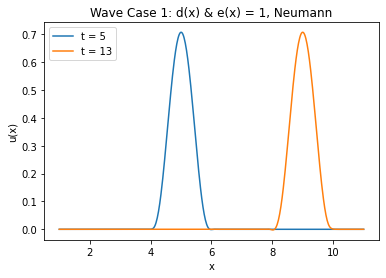

In [36]:
### Case 1

(M_1, S_1) = MS(1)
U = np.zeros(N)
V = np.zeros(N)
U_1_5 = UV(M_1, S_1, U, V, 5, "neumann")[0]

U = np.zeros(N)
V = np.zeros(N)
U_1_13 = UV(M_1, S_1, U, V, 13, "neumann")[0]

fig, ax = plt.subplots()
ax.set_xlabel('x')
ax.set_ylabel('u(x)')
ax.set_title('Wave Case 1: d(x) & e(x) = 1, Neumann')
ax.plot(x, U_1_5, label='t = 5')
ax.plot(x, U_1_13, label='t = 13')
ax.legend()

# Case 2

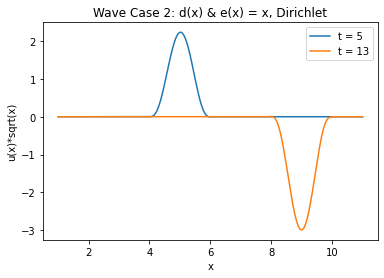

In [37]:
### Case 2

(M_2, S_2) = MS(2)
U = np.zeros(N)
V = np.zeros(N)
U_2_5 = UV(M_2, S_2, U, V, 5, "dirichlet")[0]

U = np.zeros(N)
V = np.zeros(N)
U_2_13 = UV(M_2, S_2, U, V, 13, "dirichlet")[0]

for i in range(N):
    U_2_5[i] *= np.sqrt(x[i])
    U_2_13[i] *= np.sqrt(x[i])

fig, ax = plt.subplots()
ax.set_xlabel('x')
ax.set_ylabel('u(x)*sqrt(x)')
ax.set_title('Wave Case 2: d(x) & e(x) = x, Dirichlet')
ax.plot(x, U_2_5, label='t = 5')
ax.plot(x, U_2_13, label='t = 13')
ax.legend()

# Case 3

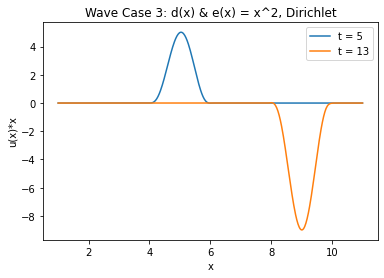

In [38]:
### Case 3

(M_3, S_3) = MS(3)
U = np.zeros(N)
V = np.zeros(N)
U_3_5 = UV(M_3, S_3, U, V, 5, "dirichlet")[0]

U = np.zeros(N)
V = np.zeros(N)
U_3_13 = UV(M_3, S_3, U, V, 13, "dirichlet")[0]

for i in range(N):
    U_3_5[i] *= x[i]
    U_3_13[i] *= x[i]

fig, ax = plt.subplots()
ax.set_xlabel('x')
ax.set_ylabel('u(x)*x')
ax.set_title('Wave Case 3: d(x) & e(x) = x^2, Dirichlet')
ax.plot(x, U_3_5, label='t = 5')
ax.plot(x, U_3_13, label='t = 13')
ax.legend()